<a href="https://colab.research.google.com/github/zih-yan/abc1/blob/main/EX03_06_%E5%87%BA%E7%94%9F%E4%BA%BA%E5%8F%A3%E6%95%B8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# 下載台北黑體字型
!wget -O taipei_sans_tc_beta.ttf https://drive.google.com/uc?id=1eGAsTN1HBpJAkeVM57_C7ccp7hbgSz3_&export=download

--2025-05-06 05:52:04--  https://drive.google.com/uc?id=1eGAsTN1HBpJAkeVM57_C7ccp7hbgSz3_
Resolving drive.google.com (drive.google.com)... 108.177.11.101, 108.177.11.138, 108.177.11.100, ...
Connecting to drive.google.com (drive.google.com)|108.177.11.101|:443... connected.
HTTP request sent, awaiting response... 303 See Other
Location: https://drive.usercontent.google.com/download?id=1eGAsTN1HBpJAkeVM57_C7ccp7hbgSz3_ [following]
--2025-05-06 05:52:04--  https://drive.usercontent.google.com/download?id=1eGAsTN1HBpJAkeVM57_C7ccp7hbgSz3_
Resolving drive.usercontent.google.com (drive.usercontent.google.com)... 108.177.11.132, 2607:f8b0:400c:c01::84
Connecting to drive.usercontent.google.com (drive.usercontent.google.com)|108.177.11.132|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 20659344 (20M) [application/octet-stream]
Saving to: ‘taipei_sans_tc_beta.ttf’

taipei_sans_tc_beta 100%[===================>]  19.70M  42.1MB/s    in 0.5s    

2025-05-06 05:52:11 (4

In [ ]:
import matplotlib
import matplotlib.pyplot as plt
# 新增字體
matplotlib.font_manager.fontManager.addfont('taipei_sans_tc_beta.ttf')
# 設定中文字型及負號正確顯示
plt.rcParams['font.sans-serif'] = 'Taipei Sans TC Beta'
plt.rcParams["axes.unicode_minus"] = False

In [ ]:
import pandas as pd

url = 'https://raw.githubusercontent.com/imchihchao/aop113b/main/materials/03-births.xls'
excel_data = pd.ExcelFile(url)

area = ['新北市','臺北市','桃園市','臺中市','臺南市','高雄市']
year = [str(i) for i in range(112, 98, -1)] # 從99年開始縣市合併

df = pd.DataFrame()
for sheet_name in excel_data.sheet_names:
    if sheet_name in year:
        df_yr = pd.read_excel(excel_data, sheet_name=sheet_name, header=4)
        df_yr = df_yr.iloc[:,0:2] # 只留前二欄：縣市及出生人口數
        df_yr.iloc[:, 0] = df_yr.iloc[:, 0].str.replace(" ", "") # 去除早期資料中縣市名稱中間有空白
        df_yr.columns = ['county','births']
        df_yr = df_yr[df_yr['county'].isin(area)] # 篩選只留下六都的資料
        df_yr.loc[:,'year'] = f'{sheet_name:>03}' # 補足99年數字為三位數
        df = pd.concat([df,df_yr], ignore_index=True)
df

,county,births,year
0,新北市,18157.0,112
1,臺北市,15920.0,112
2,桃園市,17662.0,112
3,臺中市,16813.0,112
4,臺南市,9241.0,112
...,...,...,...
75,新北市,27493,099
76,臺北市,18677,099
77,臺中市,19518,099
78,臺南市,11657,099


# 用 pivot_table 依年份計算出生數的平均值，並繪製折線圖

In [ ]:
pvt1 = pd.pivot_table(df, index='year', values='births', aggfunc='mean')
pvt1

,births
year,
099,19184.0
100,24066.4
101,28927.0
102,24209.0
103,24953.833333
104,25319.333333
105,24609.833333
106,23142.166667
107,21468.333333


<Axes: xlabel='year'>

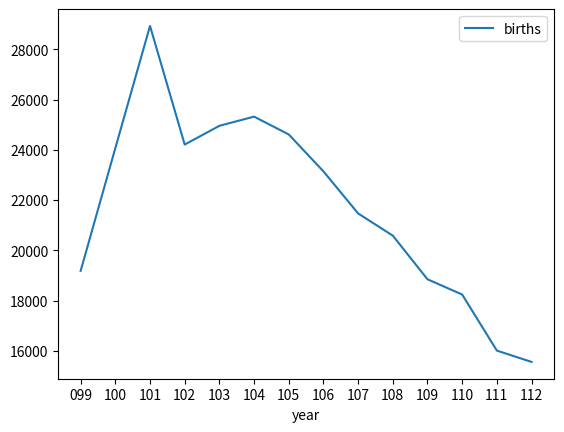

In [ ]:
import seaborn as sns
sns.lineplot(data=pvt1)

# 使用 pivot_table 依年份觀察各縣市的出生數，並繪製折線

In [ ]:
pvt2 = pd.pivot_table(df, index='year', columns='county', values='births')
pvt2

county,新北市,桃園市,臺中市,臺北市,臺南市,高雄市
year,,,,,,
099,27493.0,NaN,19518.0,18677.0,11657.0,18575.0
100,34682.0,NaN,24256.0,25439.0,14340.0,21615.0
101,41935.0,NaN,28971.0,30232.0,18030.0,25467.0
102,35188.0,NaN,24069.0,26175.0,14479.0,21134.0
103,38563.0,17471.0,26381.0,29174.0,15526.0,22608.0
104,36078.0,22513.0,26181.0,28865.0,15757.0,22522.0
105,34148.0,23752.0,25653.0,27785.0,14630.0,21691.0
106,31621.0,23430.0,24410.0,25004.0,13914.0,20474.0
107,28745.0,22568.0,22518.0,22663.0,12275.0,20041.0


<Axes: xlabel='year'>

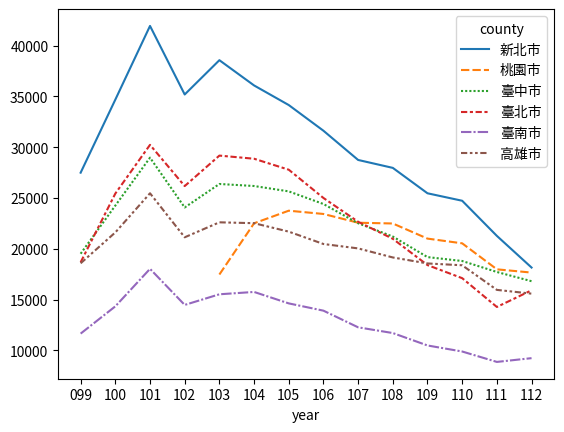

In [ ]:
sns.lineplot(data=pvt2)

# 使用 pivot_table 依縣市觀察平均最大最小出生數，並繪製長條圖


In [ ]:
pvt3 = pd.pivot_table(df, index='county', values='births', aggfunc=['mean','min','max'])
pvt3

,mean,min,max
,births,births,births
county,,,
新北市,30431.642857,18157.0,41935.0
桃園市,20941.7,17471.0,23752.0
臺中市,22549.0,16813.0,28971.0
臺北市,22907.857143,14279.0,30232.0
臺南市,12915.285714,8870.0,18030.0
高雄市,20126.142857,15589.0,25467.0


<Axes: xlabel='county', ylabel="('mean', 'births')">

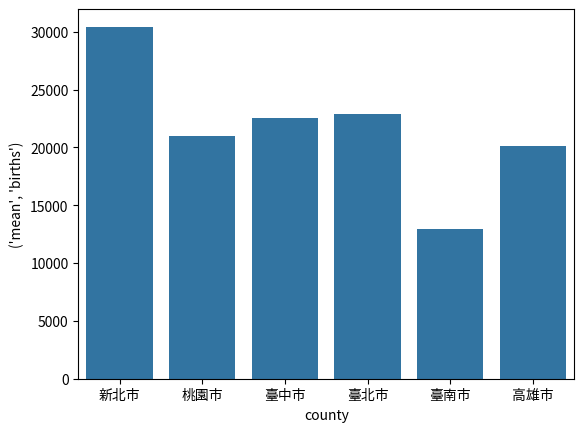

<Axes: xlabel='county', ylabel="('mean', 'births')">

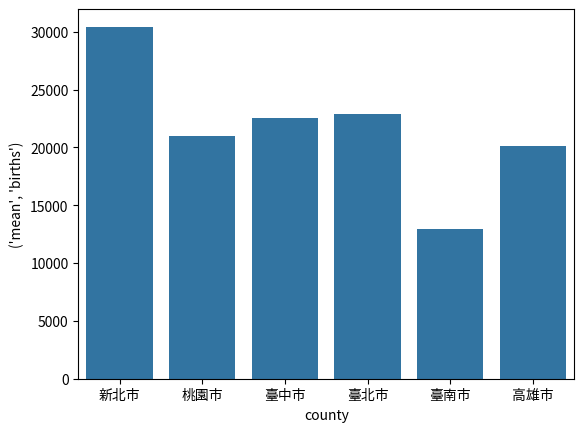

In [ ]:
sns.barplot(data=pvt3,x='county',y=('mean','births'))

# 依歷年縣市出生數繪製箱形圖

<Axes: xlabel='county', ylabel='births'>

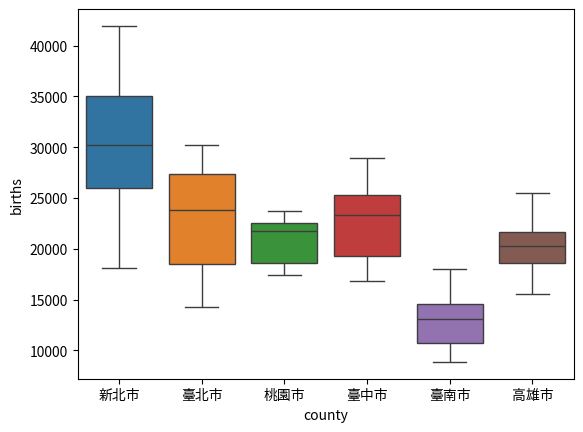

In [11]:
sns.boxplot(data=df,x='county',y='births',hue='county')